# 환경설정

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import torchvision
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from tqdm.notebook import tqdm

In [2]:
import random
manualSeed = 42
random.seed(manualSeed)
torch.manual_seed(manualSeed);

In [6]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print(str(device) + " is ready")

cuda is ready


In [26]:
# hyperparameter 설정
batch_size = 64

dim_noise = 100 # latent space의 차원

dim_hidden = 256
sz_output = 28
num_channels = 1

learning_rate = 0.0002
beta1 = 0.9

num_epochs = 200
interval_save_img = 1000

# 데이터셋

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=0,std=1)
])

In [9]:
train_data = dsets.MNIST(root='../data/', train=True, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 20.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 507kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.57MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.80MB/s]


In [10]:
train_data_loader = torch.utils.data.DataLoader(train_data, batch_size, shuffle=True)

## 시각화

In [11]:
def tc_imshow(img, lbl=""):
    if img.size(0) == 1:
        plt.imshow(img.squeeze(), cmap='gray')
    else:
        plt.imshow(np.transpose(img, (1, 2, 0)))

    plt.title(lbl)
    plt.axis('off')

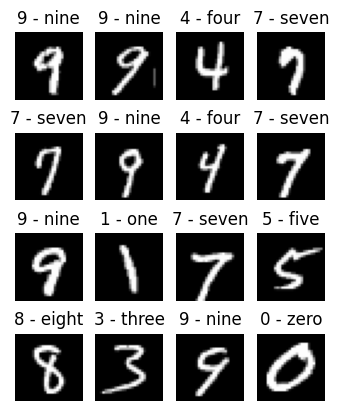

In [13]:
# visualize
mini_batch_img, mini_batch_lbl = next(iter(train_data_loader))

plt.figure(figsize=(4,5))
for i in range(16):
    plt.subplot(4,4,i+1)
    tc_imshow(img=mini_batch_img[i],
              lbl=train_data.classes[mini_batch_lbl[i].numpy()])
    plt.axis('off')


# latent space

In [16]:
def random_sample_z_space(batch_size=1, dim_noise=100):
    return torch.randn(batch_size, dim_noise, device=device)

In [18]:
dim_output = sz_output**2
img_shape = (num_channels, sz_output, sz_output)

# 모델 정의

## 생성 모델

In [19]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
                    nn.Linear(dim_noise, dim_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.1),
                    nn.Linear(dim_hidden, dim_hidden),
                    nn.ReLU(),
                    nn.Dropout(0.1),
                    nn.Linear(dim_hidden, dim_output),
                    nn.Tanh()
        )
    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), *img_shape)
        return img

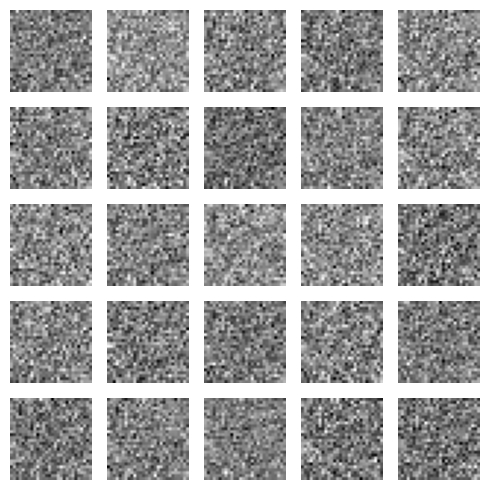

In [20]:
# visualize (아직 학습 전이라 noise만)
G = Generator().to(device)
z = random_sample_z_space(batch_size=25, dim_noise=dim_noise)

generated_images = G(z).cpu().detach()
normalized_images = (generated_images + 1) / 2

plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    tc_imshow(img=normalized_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## 탐지 모델

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(dim_output, dim_hidden),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(dim_hidden, dim_hidden),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.1),
            nn.Linear(dim_hidden, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        flat_img = img.view(img.size(0), -1)
        check_validity = self.model(flat_img)

        return check_validity

# 모델 학습

In [22]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

In [25]:
# loss func
adversarial_loss = nn.BCELoss()
# optim
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate, betas=(beta1, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(beta1, 0.999))

In [27]:
Tensor = torch.cuda.FloatTensor if is_cuda else torch.FloatTensor

Epoch 1/200:   0%|          | 0/938 [00:00<?, ?it/s]

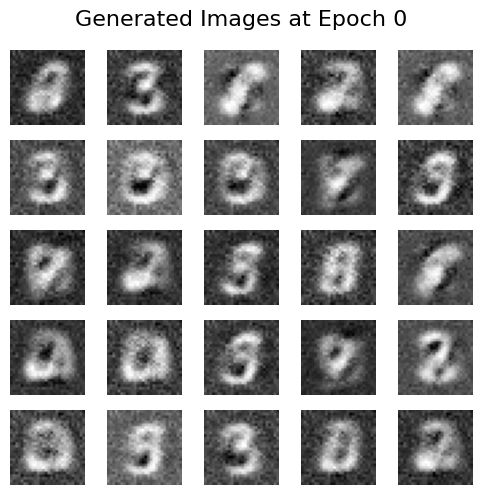

Epoch 2/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 3/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 4/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 5/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 6/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 7/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 8/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 9/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 10/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 11/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 12/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 13/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 14/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 15/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 16/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 17/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 18/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 19/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 20/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 21/200:   0%|          | 0/938 [00:00<?, ?it/s]

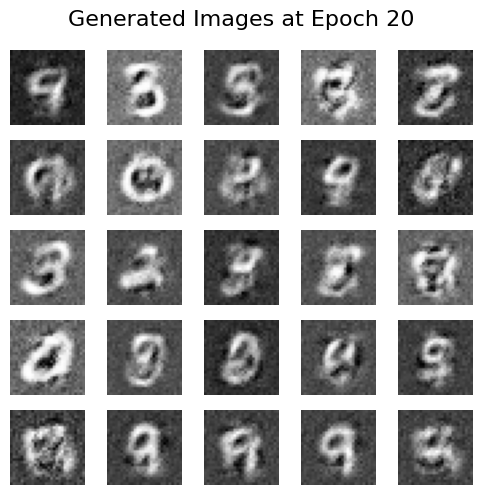

Epoch 22/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 23/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 24/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 25/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 26/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 27/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 28/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 29/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 30/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 31/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 32/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 33/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 34/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 35/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 36/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 37/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 38/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 39/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 40/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 41/200:   0%|          | 0/938 [00:00<?, ?it/s]

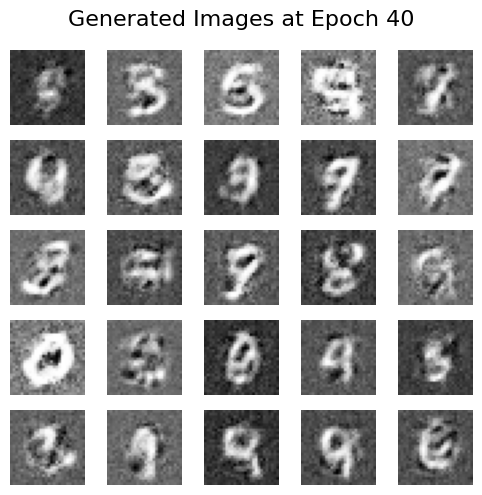

Epoch 42/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 43/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 44/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 45/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 46/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 47/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 48/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 49/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 50/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 51/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 52/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 53/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 54/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 55/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 56/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 57/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 58/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 59/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 60/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 61/200:   0%|          | 0/938 [00:00<?, ?it/s]

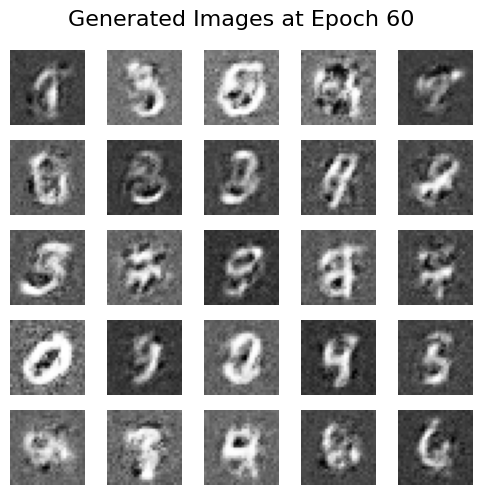

Epoch 62/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 63/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 64/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 65/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 66/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 67/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 68/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 69/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 70/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 71/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 72/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 73/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 74/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 75/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 76/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 77/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 78/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 79/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 80/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 81/200:   0%|          | 0/938 [00:00<?, ?it/s]

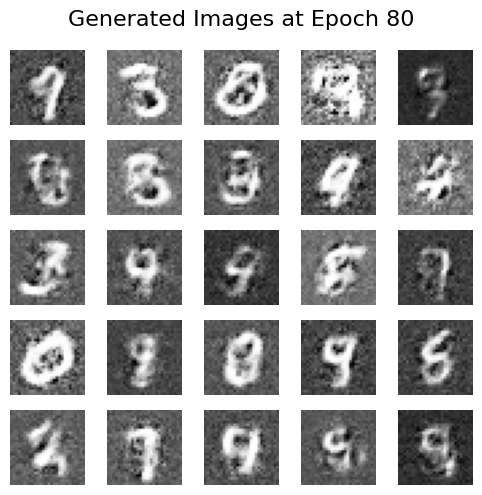

Epoch 82/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 83/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 84/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 85/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 86/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 87/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 88/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 89/200:   0%|          | 0/938 [00:00<?, ?it/s]

Epoch 90/200:   0%|          | 0/938 [00:00<?, ?it/s]

In [ ]:
losses = []

# G <- real-generated img 간 차이를 loss로 학습
# D <- real-fake 간 차이를 loss로 학습
# Define fixed noise for visualization to track progress consistently
fixed_noise = random_sample_z_space(batch_size=25, dim_noise=dim_noise)

for idx_epoch in range(num_epochs):
    pbar = tqdm(enumerate(train_data_loader), total=len(train_data_loader), desc=f"Epoch {idx_epoch+1}/{num_epochs}", leave=True)
    for idx_batch, (imgs, _) in pbar:
        # Ground truth variables indicating real/fake
        real_ground_truth = Variable(Tensor(imgs.size(0), 1).fill_(1.0), requires_grad=False)
        fake_ground_truth = Variable(Tensor(imgs.size(0), 1).fill_(0.0), requires_grad=False)

        # Real image
        real_imgs = Variable(imgs.type(Tensor))

        #####################
        # Train Generator

        optimizer_G.zero_grad()

        # Random sample noise
        z = random_sample_z_space(imgs.size(0))

        # Generate image
        gen_imgs = generator(z)

        # Generator's loss: loss between D(G(z)) and real ground truth
        loss_G = adversarial_loss(discriminator(gen_imgs), real_ground_truth)

        loss_G.backward()
        optimizer_G.step()


        #####################
        # Train Discriminator

        optimizer_D.zero_grad()

        loss_real = adversarial_loss(discriminator(real_imgs), real_ground_truth)
        loss_fake = adversarial_loss(discriminator(gen_imgs.detach()), fake_ground_truth)
        loss_D = (loss_real+loss_fake)/2

        loss_D.backward()
        optimizer_D.step()


        #####################
        # archieve loss
        losses.append([loss_G.item(), loss_D.item()])

        # Update progress bar
        pbar.set_postfix(loss_G=f"{loss_G.item():.6f}", loss_D=f"{loss_D.item():.6f}")

    # Visualize generated images at the end of every 20th epoch (including epoch 0)
    if idx_epoch % 20 == 0:
        generator.eval() # Set generator to evaluation mode for visualization
        with torch.no_grad(): # Disable gradient calculations for visualization
            generated_images_to_display = generator(fixed_noise).cpu().detach()
        generator.train() # Set generator back to training mode

        normalized_images = (generated_images_to_display + 1) / 2 # Normalize to [0, 1] for display

        plt.figure(figsize=(5, 5))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            tc_imshow(img=normalized_images[i])
            plt.axis('off')
        plt.suptitle(f'Generated Images at Epoch {idx_epoch}', fontsize=16) # Add a title indicating the epoch
        plt.tight_layout()
        plt.show()

In [ ]:
# Random sample noise
z = random_sample_z_space(batch_size)

# Generate image
gen_imgs = generator(z)

# visualize
generated_images_to_display = gen_imgs.data[:25].cpu().detach()
normalized_images = (generated_images_to_display + 1) / 2 # Normalize to [0, 1] for display

plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    tc_imshow(img=normalized_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# interpolation

In [ ]:
z_opposites = random_sample_z_space(2)
fake_img = generator(z_opposites)

plt.subplot(121); plt.imshow(fake_img[0].squeeze().cpu().detach(), cmap='gray')
plt.subplot(122); plt.imshow(fake_img[1].squeeze().cpu().detach(), cmap='gray')

In [ ]:
num_interpolation = 10

z_interpolation = Variable(Tensor(np.linspace(z_opposites[0].cpu(), z_opposites[1].cpu(), num_interpolation)))
fake_img = generator(z_interpolation)

plt.figure(figsize=(12,2))
for i in range(num_interpolation):
    plt.subplot(1,num_interpolation,i+1)
    plt.imshow(fake_img[i].squeeze().cpu().detach(), cmap='gray')
    plt.axis('off')


## 모델 저장

In [31]:
from google.colab import drive

drive.mount('/content/drive')
path = '/content/drive/MyDrive/DDFS/model'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
torch.save({
    'epoch': num_epochs,
    'model_G_state_dict': generator.state_dict(),
    'model_D_state_dict': discriminator.state_dict(),
    'optimizer_G_state_dict': optimizer_G.state_dict(),
    'optimizer_D_state_dict': optimizer_D.state_dict()
}, path + '/GAN.pt')